# Knowing the Dataset

In this part we will analyse the dataset *Wine* located on http://archive.ics.uci.edu, these data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

# Analyse method 



*   Extract the data from .data file;
*   Split the data per class;
*   Extract quantitative features(Mean, standard deviation);
*   Show the data graphically;
*   Analyse the correlation between the attributes;
*   Analyse graphically the trend line of the data
*   PCA transform;
*   Analyse graphically the result.


# Results

**Extract the data from .data file**


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

F = open('wine.data','r')
dados=[]
value = F.read()
amostras = value.split('\n')
amostraN = 2

value = value.replace("\n",",")
value = value.replace(" ",",")
dados = value.split(',')
atributos = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280 / OD315 of diluted wines", "Proline" ]
classesNames = ["AB","NO"]
nClasses = 3


if '' in dados:
  dados.remove('')
  
if '' in amostras:
  amostras.remove('')


**Split the data per class and extract quantitative features**

The data was sliced by classes to analyse the quantitative feature individually.

In [12]:
nAmostras = len(amostras)
nAtributos = int(len(dados)/len(amostras))
matrizDados = np.zeros((nAmostras,nAtributos))
classes = []
media = []
desvio = []
indX = indY = 0

for i in range(nAmostras):
  indX=0
  for y in range(nAtributos):
    
    matrizDados[indY,indX] = dados[(i*nAtributos+y)]
    indX+=1
   
  indY+=1

if amostraN == 2 or amostraN == 3:
  matrizDadosCP = matrizDados.copy()
  matrizDados[:,0:nAtributos-1] = matrizDadosCP[:,1:nAtributos]
  matrizDados[:,nAtributos-1] = matrizDadosCP[:,0]
  matrizDados[:,nAtributos-1] -= 1
  
print("------------Quantitative analysis:------------")
print("N° Features: ",nAtributos-1)
print("N° classes: ",nClasses)
print("N° Samples: ",nAmostras)

#Separar Classes e calcular Media e desvio
for i in range(nClasses):
  
  adicionar = (matrizDados[matrizDados[:,nAtributos-1]==i])[:,0:nAtributos-1]
  classes.append(adicionar)
  print("\n")
  print("Classe ",i,"(",len(adicionar)," Features)")
  print("Mean:")
  for y in adicionar.mean(axis=0):
    print(round(y,2),"|",end="")
  print("")
  print("deviation:")
  for y in adicionar.std(axis=0):
    print(round(y,2),"|",end="")
  print("")

print("")
print("--Complete data--")
print("Mean:")
for i in matrizDados[:,0:nAtributos-1].mean(axis=0):
  print(round(i,2),"|",end="")
print("")
print("Deviation:")
for i in matrizDados[:,0:nAtributos-1].std(axis=0):
  print(round(i,2),"|",end="")
print("")


------------Quantitative analysis:------------
N° Features:  13
N° classes:  3
N° Samples:  178


Classe  0 ( 59  Features)
Mean:
13.74 |2.01 |2.46 |17.04 |106.34 |2.84 |2.98 |0.29 |1.9 |5.53 |1.06 |3.16 |1115.71 |
deviation:
0.46 |0.68 |0.23 |2.52 |10.41 |0.34 |0.39 |0.07 |0.41 |1.23 |0.12 |0.35 |219.64 |


Classe  1 ( 71  Features)
Mean:
12.28 |1.93 |2.24 |20.24 |94.55 |2.26 |2.08 |0.36 |1.63 |3.09 |1.06 |2.79 |519.51 |
deviation:
0.53 |1.01 |0.31 |3.33 |16.64 |0.54 |0.7 |0.12 |0.6 |0.92 |0.2 |0.49 |156.1 |


Classe  2 ( 48  Features)
Mean:
13.15 |3.33 |2.44 |21.42 |99.31 |1.68 |0.78 |0.45 |1.15 |7.4 |0.68 |1.68 |629.9 |
deviation:
0.52 |1.08 |0.18 |2.23 |10.78 |0.35 |0.29 |0.12 |0.4 |2.29 |0.11 |0.27 |113.89 |

--Complete data--
Mean:
13.0 |2.34 |2.37 |19.49 |99.74 |2.3 |2.03 |0.36 |1.59 |5.06 |0.96 |2.61 |746.89 |
Deviation:
0.81 |1.11 |0.27 |3.33 |14.24 |0.62 |1.0 |0.12 |0.57 |2.31 |0.23 |0.71 |314.02 |


**-Analysis-**

Due the unbalanced samples the analysis need to be doing class by class.
Note:
<br>-> Lower deviation.
<br>-> Classes mean very close.


**Show the data graphically;**

Due there are a lot of samples it's better to analisis to the data graphically then in a table, so it was ploted in a 2D graphic usind the features in the axes X and Y.

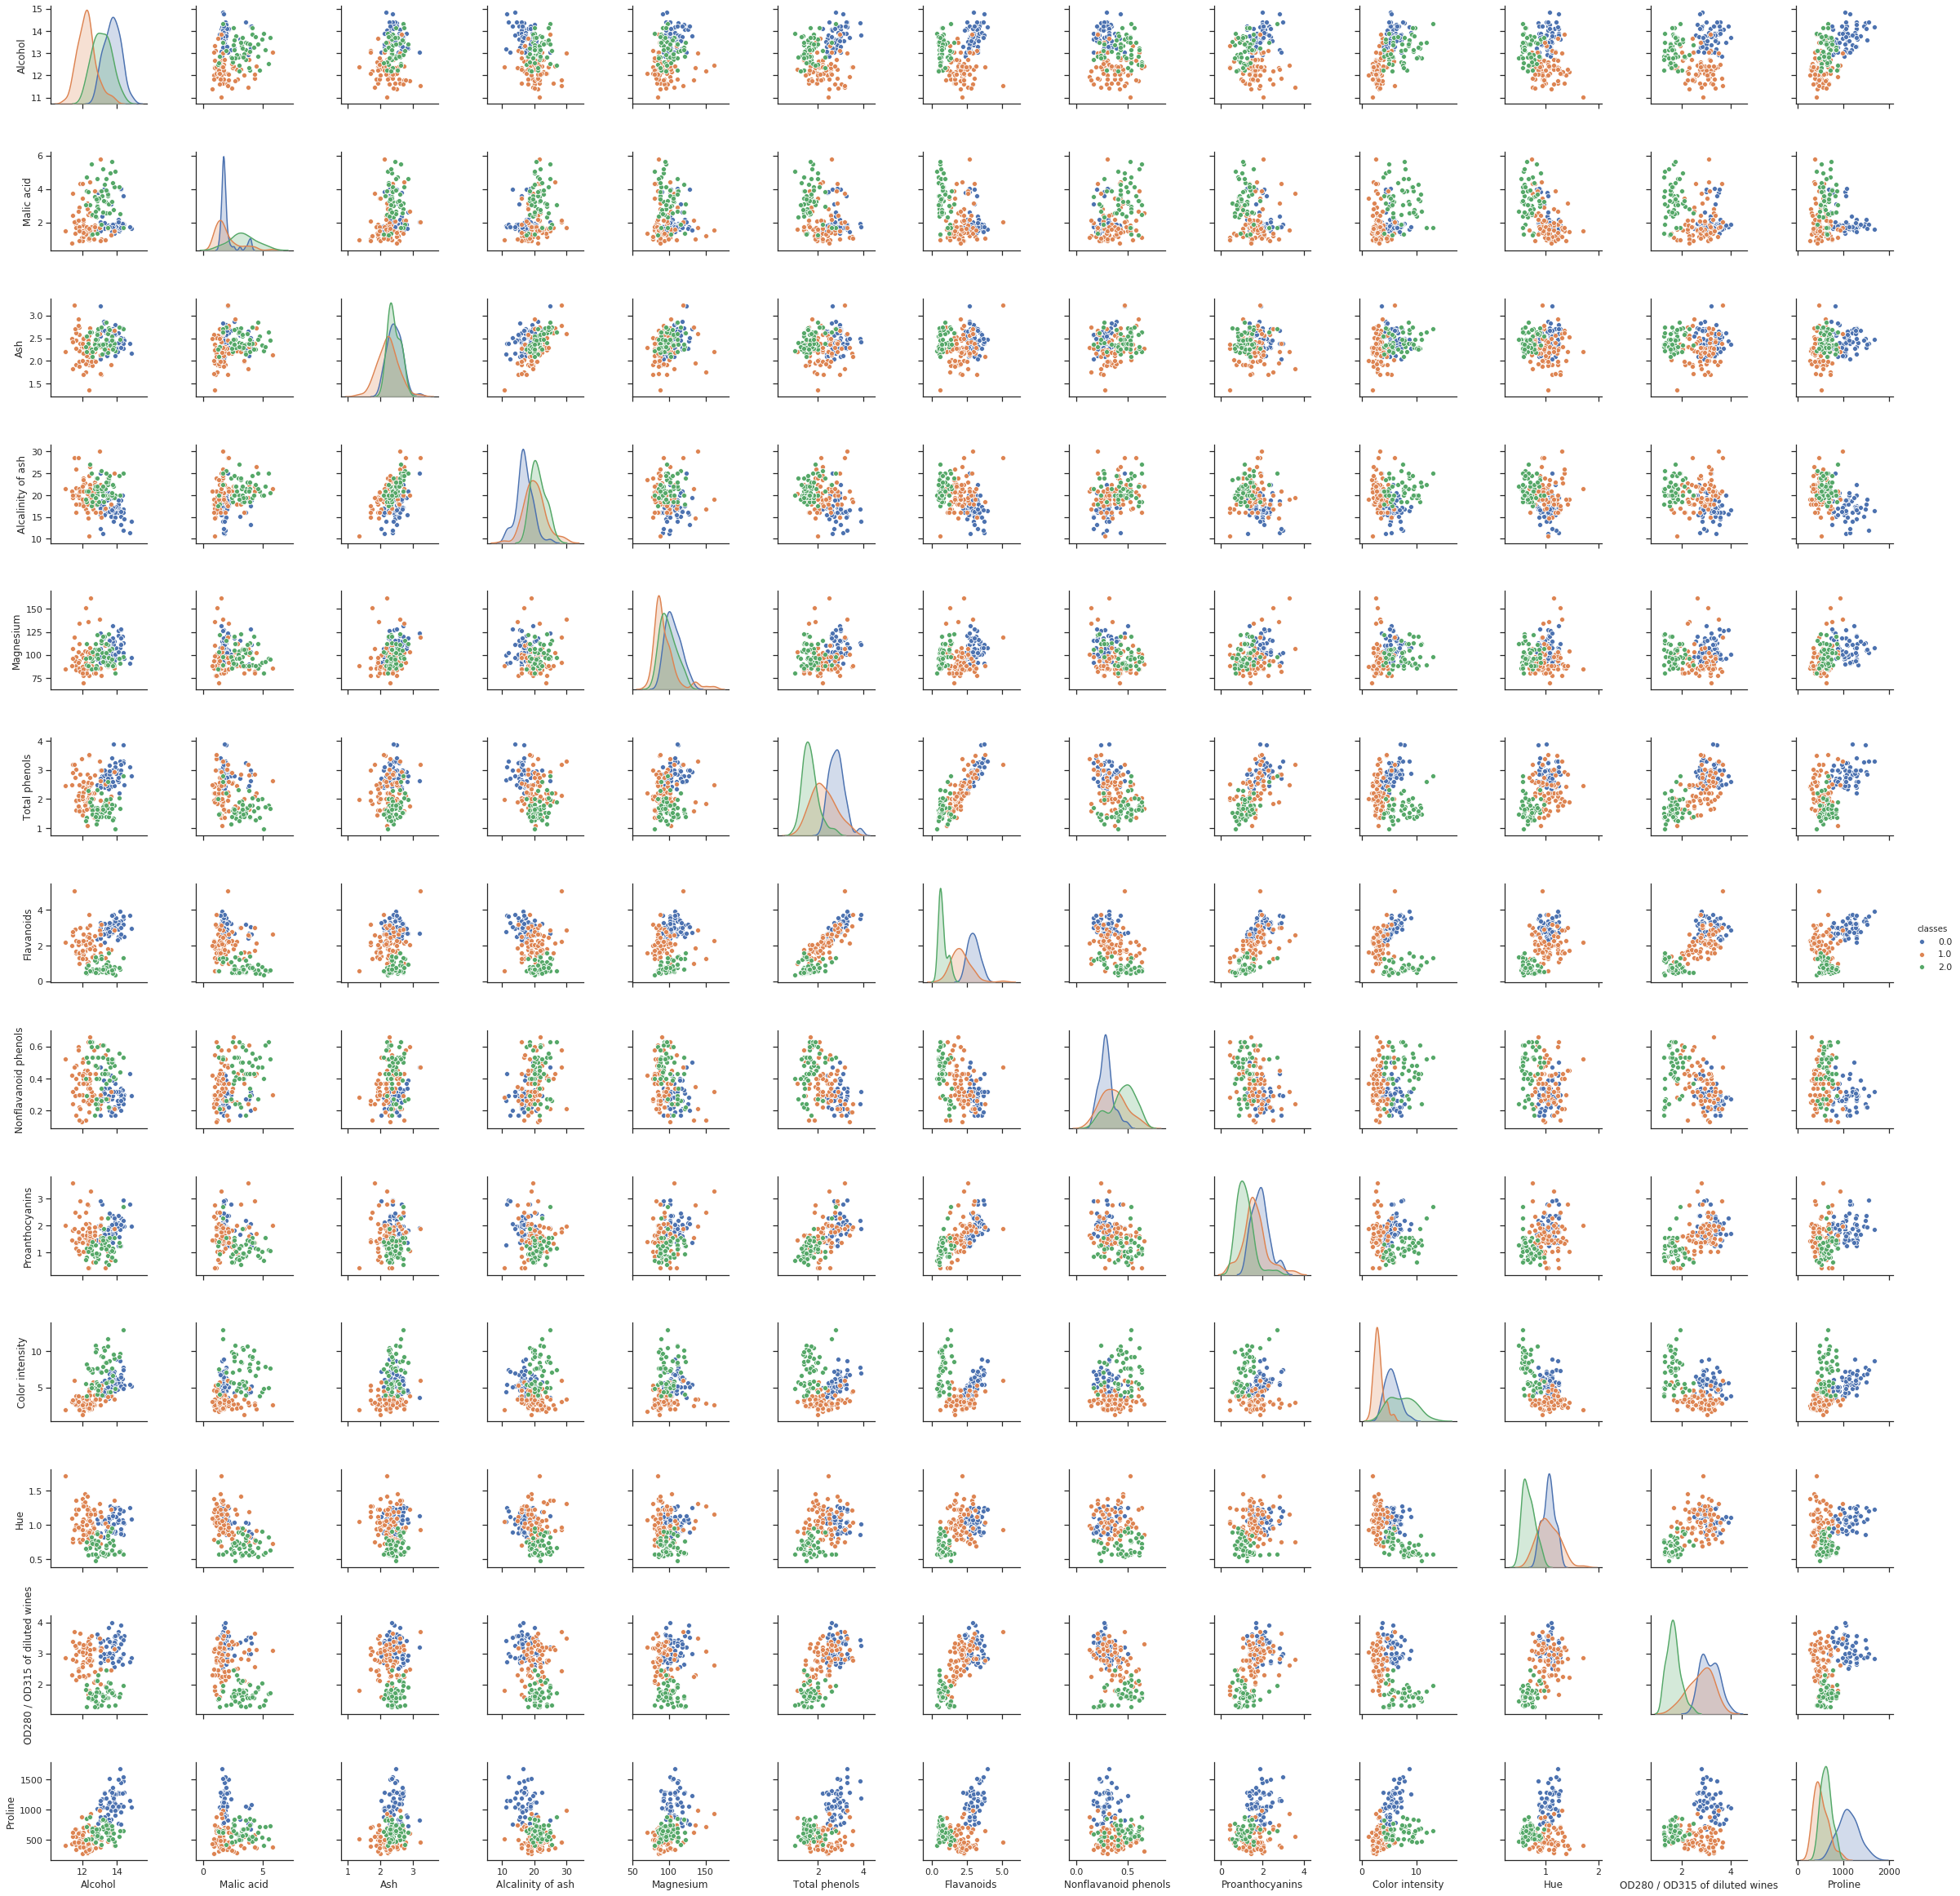

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns


att = atributos.copy()
att.append("classes")
df = pd.DataFrame(matrizDados,columns=att)
sns.set(style="ticks")
sns.pairplot(df, hue="classes", vars=atributos)

**-Analysis-**

The graph shows that the classes are in overlap, so considering only two features is not possible classifier it and have as return a great result, but using just two features to classifier it, the best combination of features is OD280/OD315 of diluted wines X Proline.

**Analyse the correlation between the attributes**

To understand how the features relation among themself i used corrcoef method which return a correlation matrix.

---------------------------Correlation matrix--------------------------


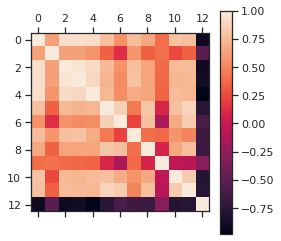

In [14]:
dados = matrizDados[:,:nAtributos-1]
normalized = preprocessing.normalize(dados)
print("---------------------------Correlation matrix--------------------------")
coefCorre = np.corrcoef(normalized.T)
plt.matshow(coefCorre)
plt.colorbar()
plt.show()

**Analyse the correlation between the attributes**

To see how the data distributed itself, we use a regression and look to a trend line.


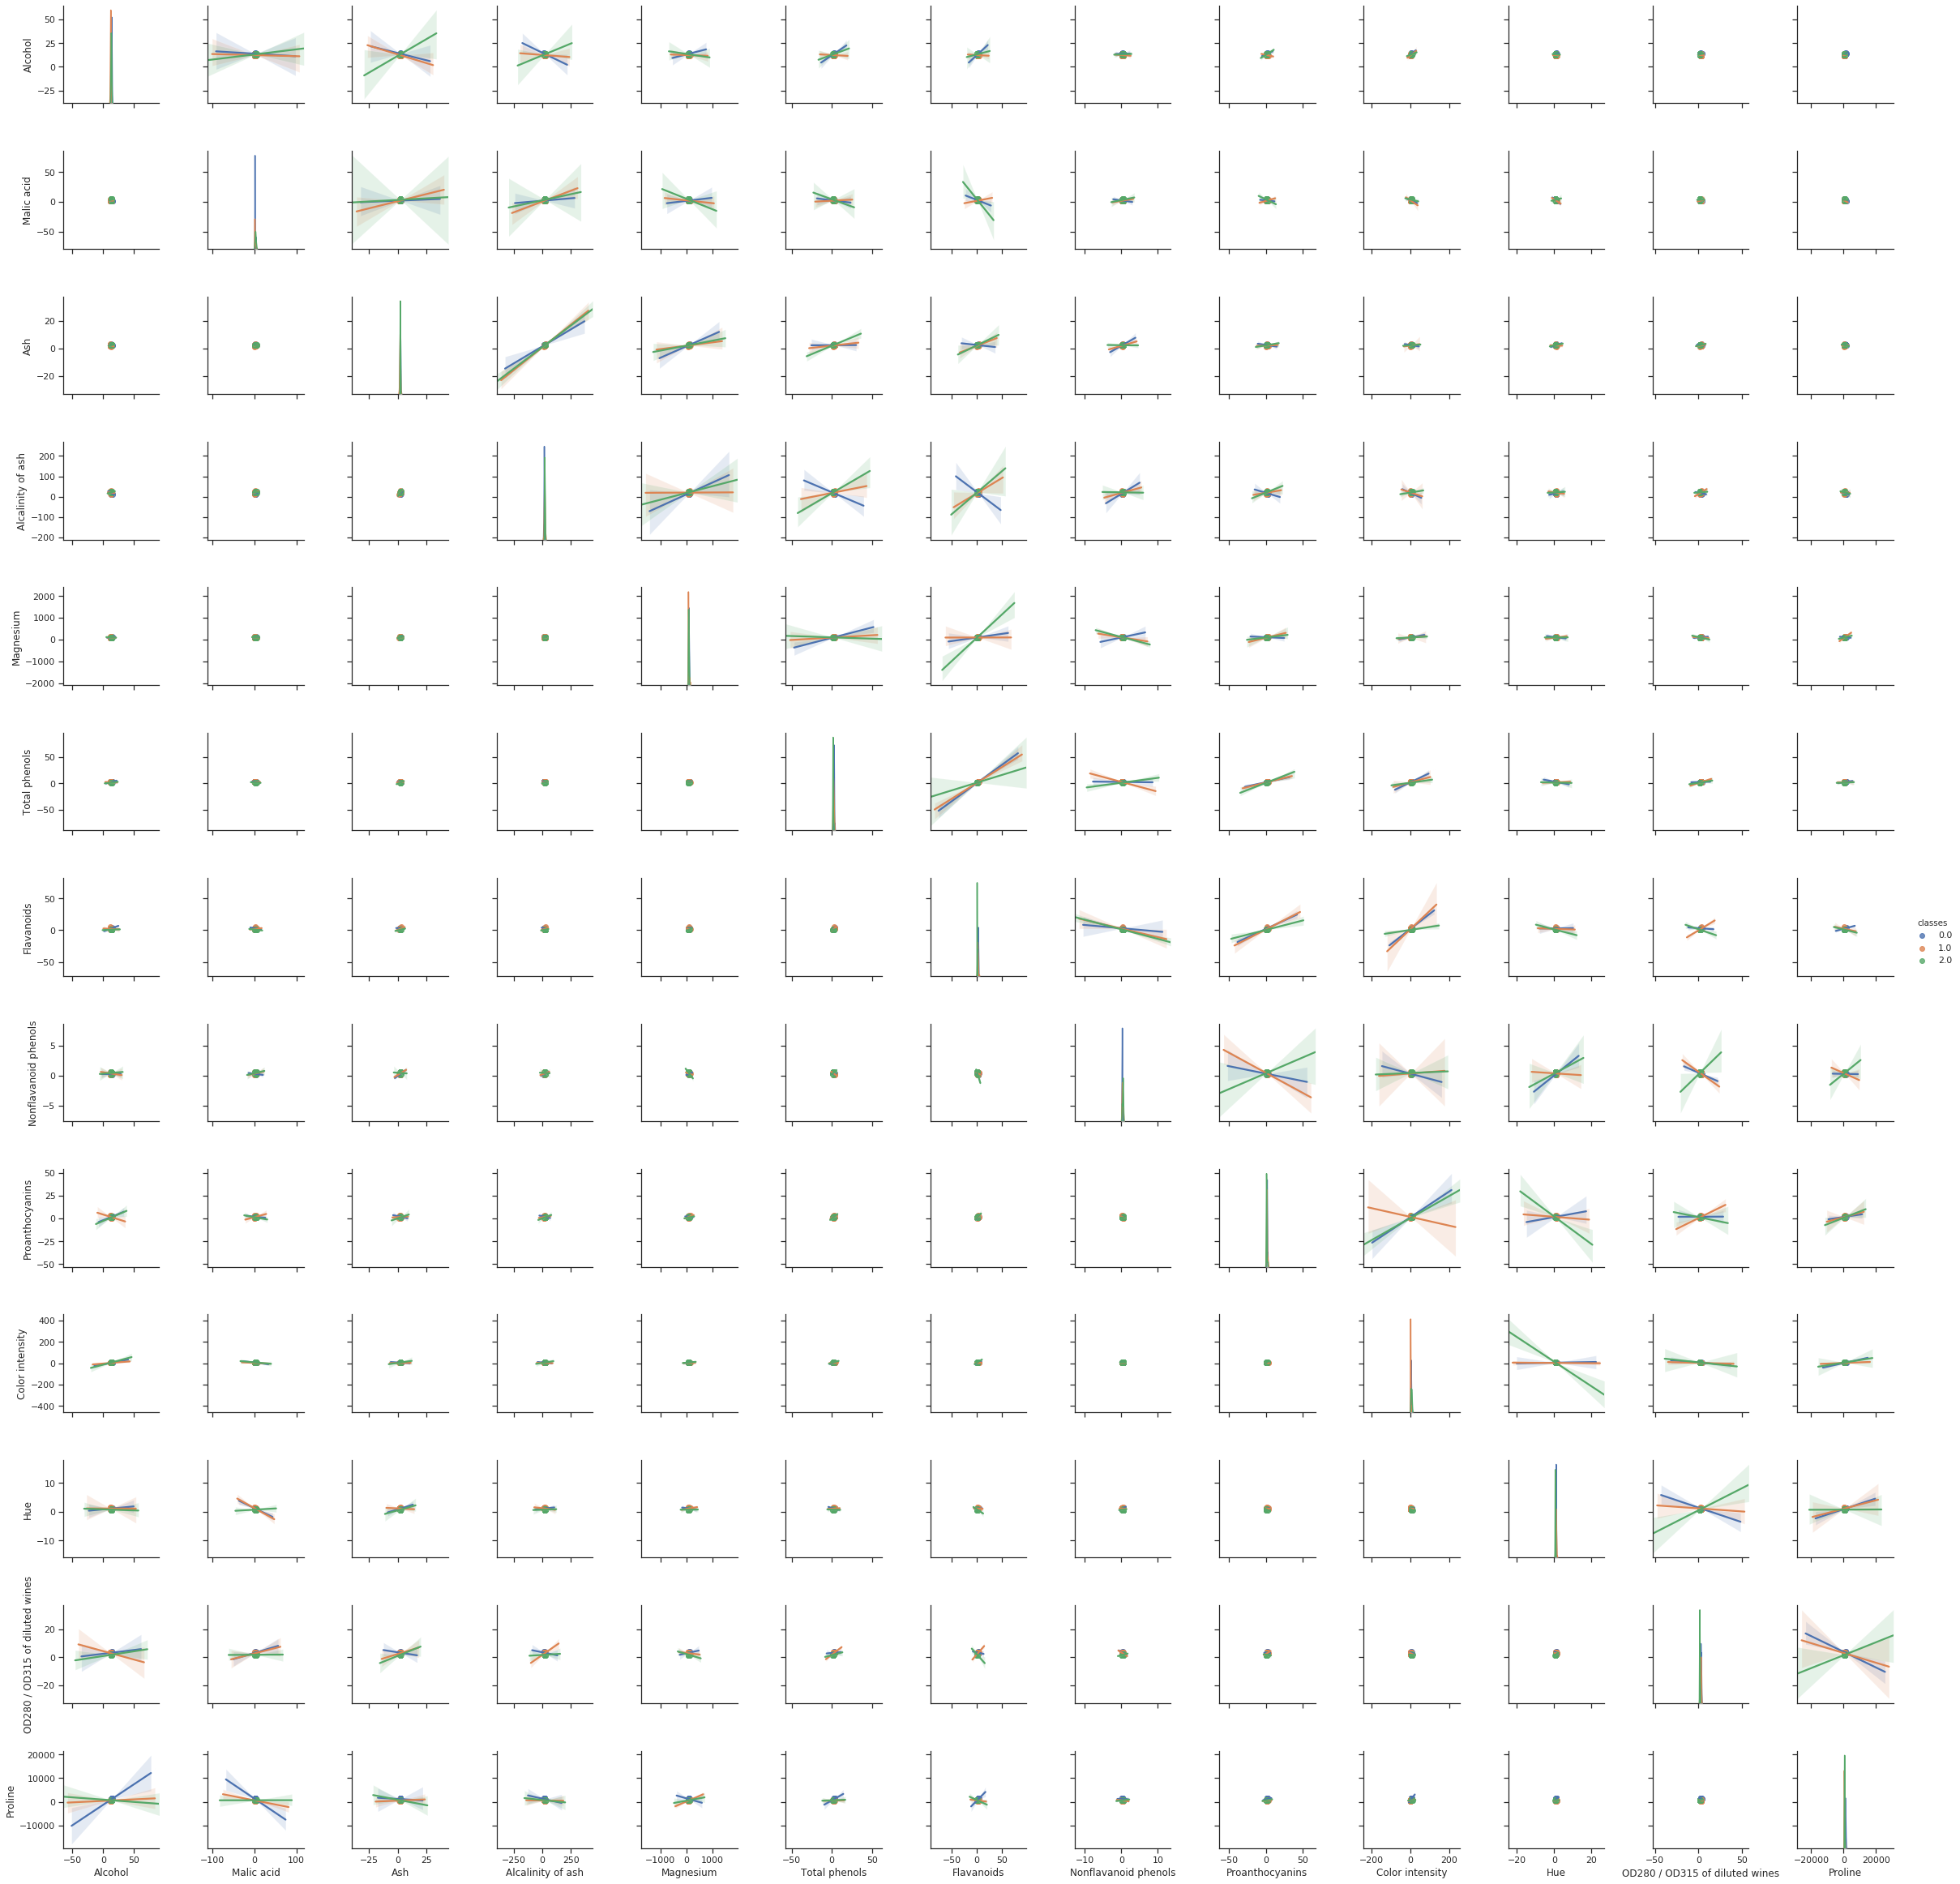

In [15]:
if amostraN == 0 or amostraN == 1 or amostraN == 2:
  scplot = sns.pairplot(df, hue="classes", vars=atributos,kind="reg")


**-Analysis-**

Looking to the correlation matrix It's visible that some of the features have a strong relation between them, so they have redundant informations.
Note: It's possible exclude some features and keep almost the same result.


**PCA transform**

Due the classes be overlap was applied an orthogonal transformation.

In [0]:
atributoIRelev = []
atributoRelev = []
for cont, i in enumerate(coefCorre):
  #print(i)
  for cont2, y in enumerate(i[cont:]):
    if cont != (cont2+cont) and abs(y)>0.9:
      if not((cont2+cont) in atributoIRelev):
        atributoIRelev.append((cont2+cont))
  
dadosRelev = []

for i in range(nAtributos):
  if i not in atributoIRelev or i==nAtributos-1:
    atributoRelev.append(i)
    dadosRelev.append(matrizDados[:,i])

dadosRelev = np.array(dadosRelev)
dadosRelev = dadosRelev.T
att2 = []
for i in atributoRelev:
  if i==(nAtributos-1):
    att2.append("classes")
  else:
    att2.append(atributos[i])
dfRelevants = pd.DataFrame(dadosRelev,columns=att2)
sns.set(style="ticks")

In [0]:


dados = dadosRelev[:,:-2].copy()
normalized = preprocessing.normalize(dados)
a = np.cov(normalized.T)
altValor, altVetor = np.linalg.eigh(a)
dadosN2 = normalized@altVetor
matrizDadosPlano2 = dadosRelev.copy()
matrizDadosPlano2[:,:-2] = dadosN2

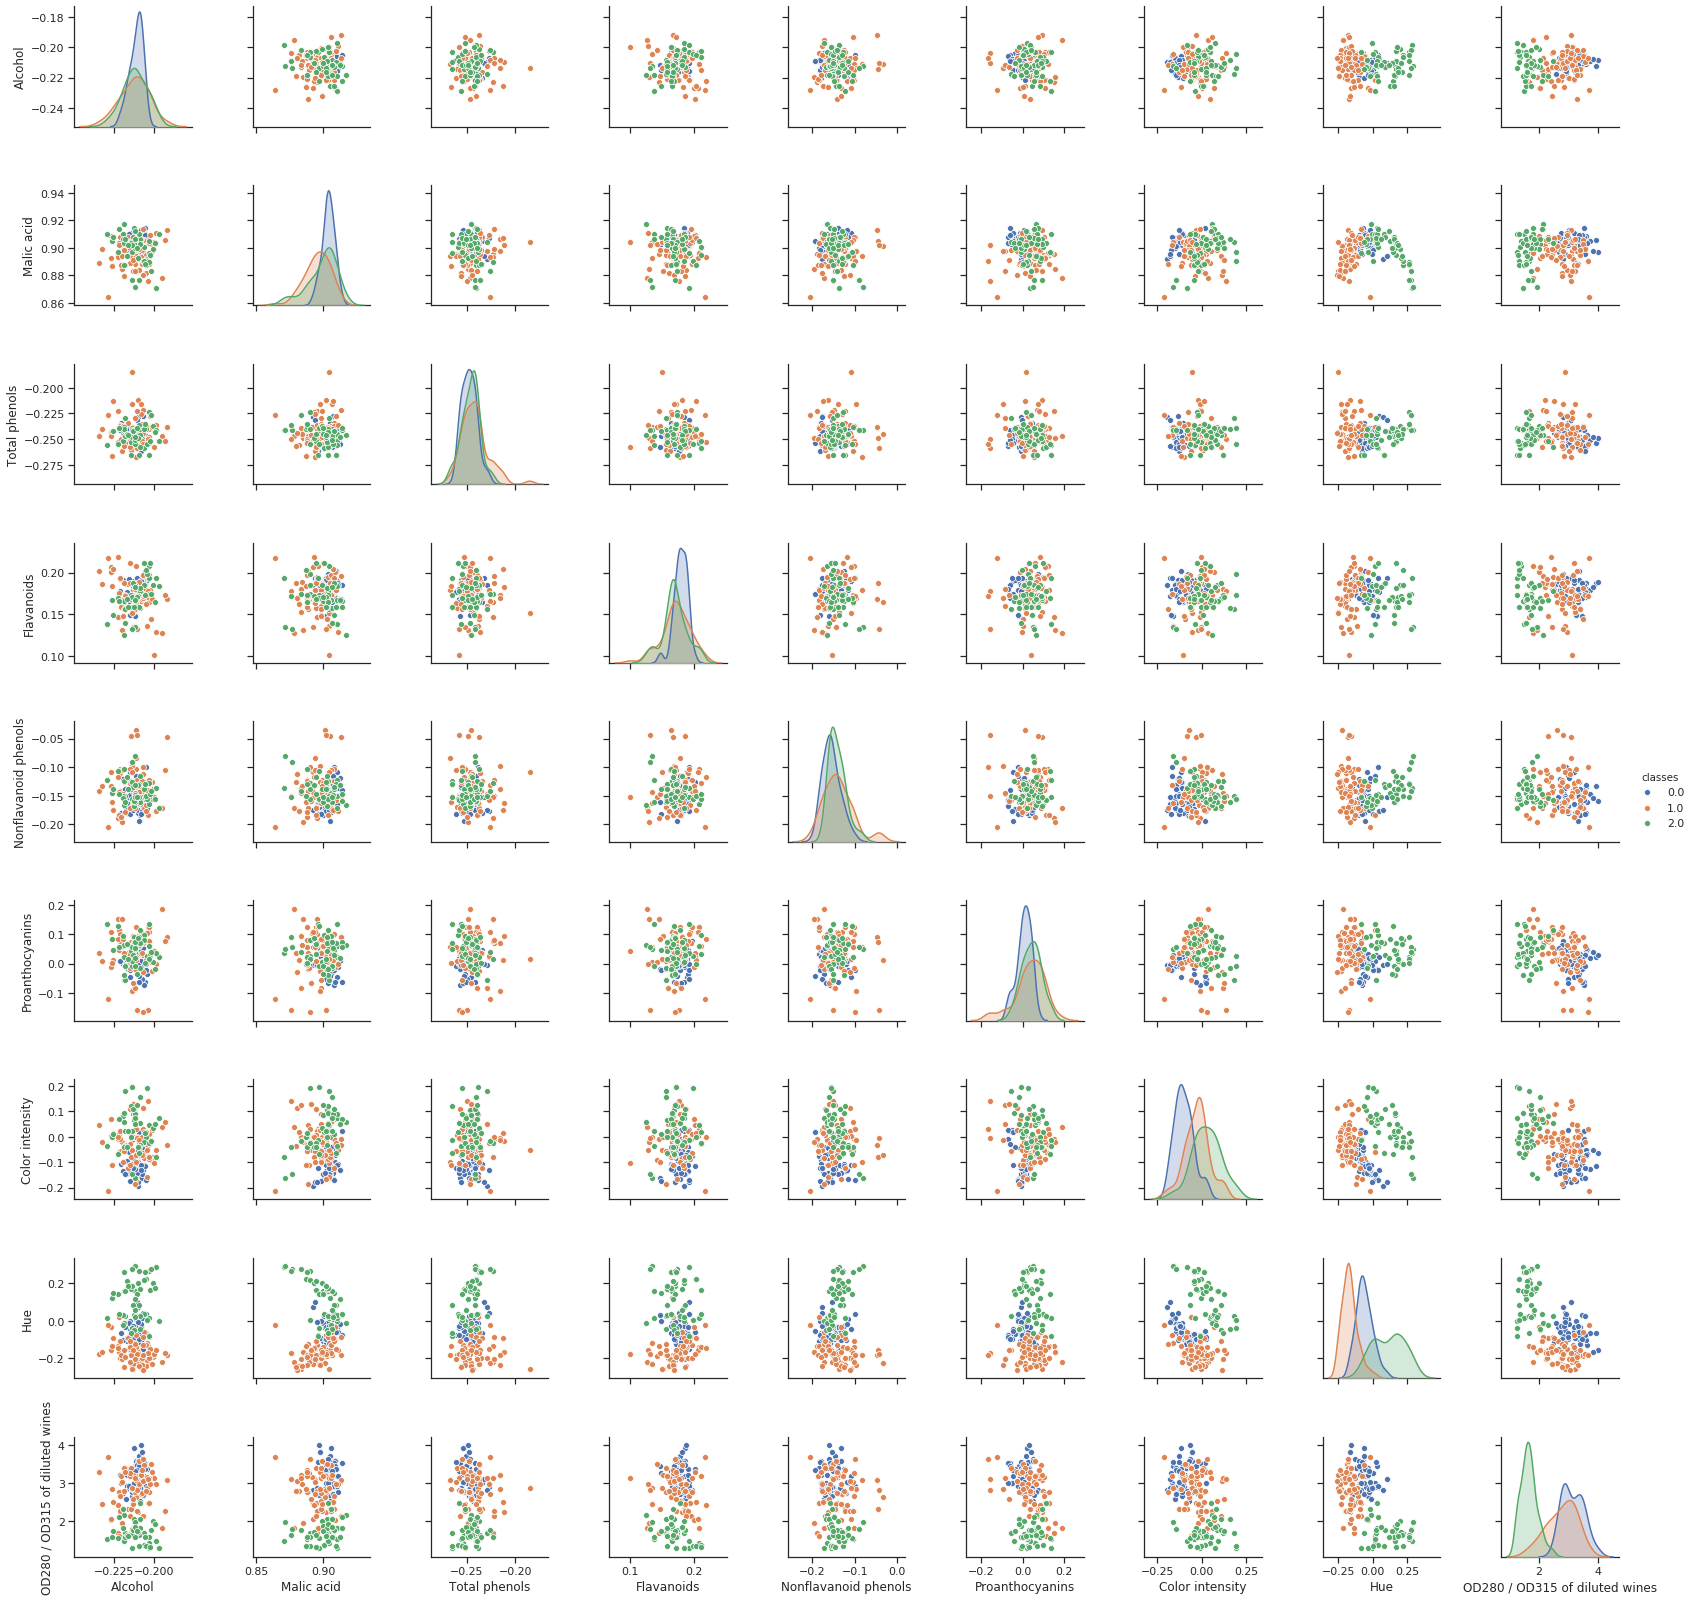

In [23]:
df2 = pd.DataFrame(matrizDadosPlano2,columns=att2)
sns.set(style="ticks")
sns.pairplot(df2, hue="classes", vars=att2[:-1])

**-Analysis-**
After apply the transformation the classes keeped in overla, so it's not help us to classify the classes using just two features. 